In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-06 01:24:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-06 01:24:57 (104 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-05 23:45:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.2MB/s    in 8.1s    

2023-06-05 23:46:05 (19.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
import tensorflow as tf
IMG_SIZE = (224, 224)

In [9]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[1.00000000e+01 7.00000000e+00 2.00000000e+00]
   [1.00000000e+01 7.00000000e+00 2.00000000e+00]
   [1.00000000e+01 7.00000000e+00 2.00000000e+00]
   ...
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]]

  [[1.00000000e+01 7.00000000e+00 2.00000000e+00]
   [1.00000000e+01 7.00000000e+00 2.00000000e+00]
   [1.00000000e+01 7.00000000e+00 2.00000000e+00]
   ...
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]]

  [[1.00000000e+01 7.00000000e+00 2.00000000e+00]
   [1.00000000e+01 7.00000000e+00 2.00000000e+00]
   [1.00000000e+01 7.00000000e+00 2.00000000e+00]
   ...
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]
   [1.00000000e+00 1.00000000e+00 3.00000000e+00]]

  ...

  [[1.79785736e+02 1.70785736e+02 1.63785736e+02]
   [1

In [13]:
IMG_SIZE+(3,)

(224, 224, 3)

In [14]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

x = base_model(inputs)

print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Shape after GlobalAveragePooling2D(): {x.shape}")

16705208/16705208 [==============================] - 2s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)


In [15]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

In [16]:
model_0 = tf.keras.Model(inputs, outputs)

In [17]:
model_0.compile(loss="categorical_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [18]:
model_0_history = model_0.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25 * len(test_data_10_percent)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230605-234617
Epoch 1/5
24/24 [==============================] - 19s 228ms/step - loss: 1.9009 - accuracy: 0.3947 - val_loss: 1.3117 - val_accuracy: 0.7368
Epoch 2/5
24/24 [==============================] - 4s 145ms/step - loss: 1.1002 - accuracy: 0.7747 - val_loss: 0.8385 - val_accuracy: 0.8372
Epoch 3/5
24/24 [==============================] - 4s 173ms/step - loss: 0.7761 - accuracy: 0.8293 - val_loss: 0.6704 - val_accuracy: 0.8635
Epoch 4/5
24/24 [==============================] - 5s 176ms/step - loss: 0.6341 - accuracy: 0.8600 - val_loss: 0.5802 - val_accuracy: 0.8717
Epoch 5/5
24/24 [==============================] - 4s 153ms/step - loss: 0.5443 - accuracy: 0.8813 - val_loss: 0.5057 - val_accuracy: 0.8931


In [ ]:
plot_loss_curves(model_0_history)

In [ ]:
base_model.summary()

In [21]:
len(base_model.layers)

238

In [22]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
len(model_0.layers)

4

### Feature vector and `tf.keras.layers.GlobalAveragePooling2D()`

In [28]:
input_shape = (1, 4, 5, 3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"Random tensor: \n {input_tensor} \n")

average_pooling_2D = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"After global 2D pooling: \n {average_pooling_2D} \n")

Random tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]
   [-0.59722406 -1.9171132  -0.62044144]]

  [[ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]
   [ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]]

  [[ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]
   [-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]]

  [[-0.35819843  0.88698614  0.52744764]
   [ 0.70402247 -0.33421248  0.21639644]
   [-0.97485447 -0.20757681 -0.03647729]
   [-1.3353444   0.6885855   1.1110833 ]
   [ 0.40130252  0.6320586  -0.39030614]]]] 

After global 2D pooling: 
 [[-0.13519286 -0.32778087 -0.18581301]] 



In [29]:
print(f"average_pooling_2D shape: {average_pooling_2D.shape}")
print(f"random tensor shape: {input_tensor.shape}")

average_pooling_2D shape: (1, 3)
random tensor shape: (1, 4, 5, 3)


As we can see `GlobalAveragePooling2D()` converts the tensor to a vector ( (4, 5) is gone after average poling).<br>  

In [32]:
cstom_reduce = tf.reduce_mean(input_tensor, axis=[1, 2])
print(f"Custom reduce: {cstom_reduce} \n")
print(f"After global 2D pooling: {average_pooling_2D} \n")

Custom reduce: [[-0.13519286 -0.32778087 -0.18581301]] 

After global 2D pooling: [[-0.13519286 -0.32778087 -0.18581301]] 



Let's do a quick experiment with `tf.keras.layers.GlobalMaxPool2D()`

In [34]:
pooling_2D = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"After max pool 2D: {pooling_2D}")
print(f"After global 2D pooling: {average_pooling_2D} ")

After max pool 2D: [[0.9058464 1.1603122 1.6994323]]
After global 2D pooling: [[-0.13519286 -0.32778087 -0.18581301]] 


## Creating `model_1` (1% data with data augmentation)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-06-06 01:27:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.2MB/s    in 6.8s    

2023-06-06 01:27:10 (18.7 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [6]:
unzip_data("10_food_classes_1_percent.zip")

In [7]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [8]:
walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train/'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.


In [11]:
IMG_SIZE = (224, 224)
train_data_1_percent = preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=32)

test_data = preprocessing.image_dataset_from_directory(test_dir,
                                                       label_mode="categorical",
                                                       image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [30]:
image_augmentation = tf.keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
], name="image_augmentation")

In [17]:
# view a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

(-0.5, 425.5, 442.5, -0.5)

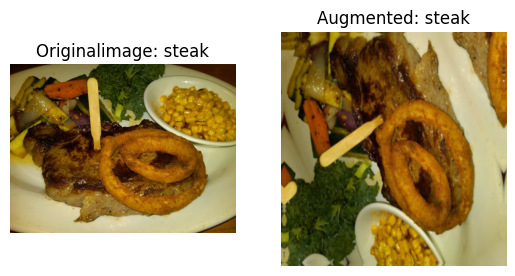

In [36]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Originalimage: {target_class}")
plt.axis(False)

augmented_img = image_augmentation(img/255.)
plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title(f"Augmented: {target_class}")
plt.axis(False)

In [48]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = image_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

In [49]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [50]:
model_1_history = model_1.fit(train_data_1_percent,
                  epochs=5,
                  steps_per_epoch=len(train_data_1_percent),
                  validation_data=test_data,
                  validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
3/3 [==============================] - 13s 2s/step - loss: 2.5008 - accuracy: 0.0571 - val_loss: 2.3059 - val_accuracy: 0.1266
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.3243 - accuracy: 0.1000 - val_loss: 2.1935 - val_accuracy: 0.1974
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 2.1069 - accuracy: 0.2714 - val_loss: 2.0950 - val_accuracy: 0.2961
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.9876 - accuracy: 0.3714 - val_loss: 2.0205 - val_accuracy: 0.3684
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.8223 - accuracy: 0.5571 - val_loss: 1.9329 - val_accuracy: 0.4243


In [51]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 image_augmentation (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [52]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 9s 104ms/step - loss: 1.9525 - accuracy: 0.3976


[1.9524681568145752, 0.397599995136261]

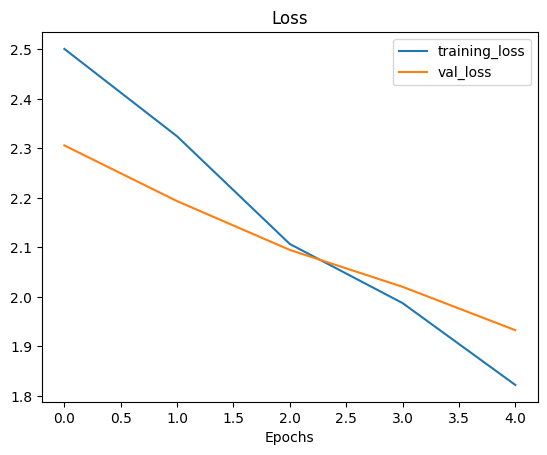

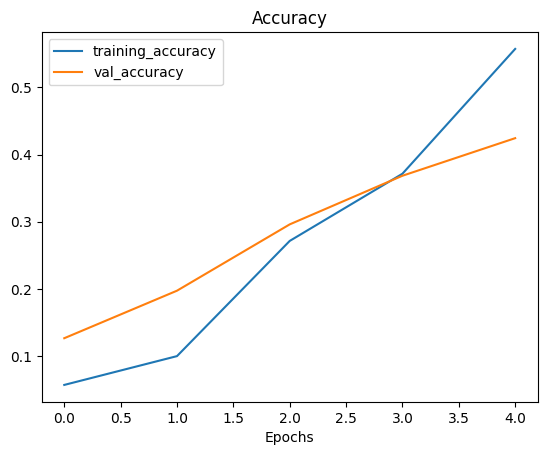

In [53]:
plot_loss_curves(model_1_history)